In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.drop("CustomerID",axis=1,inplace=True)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


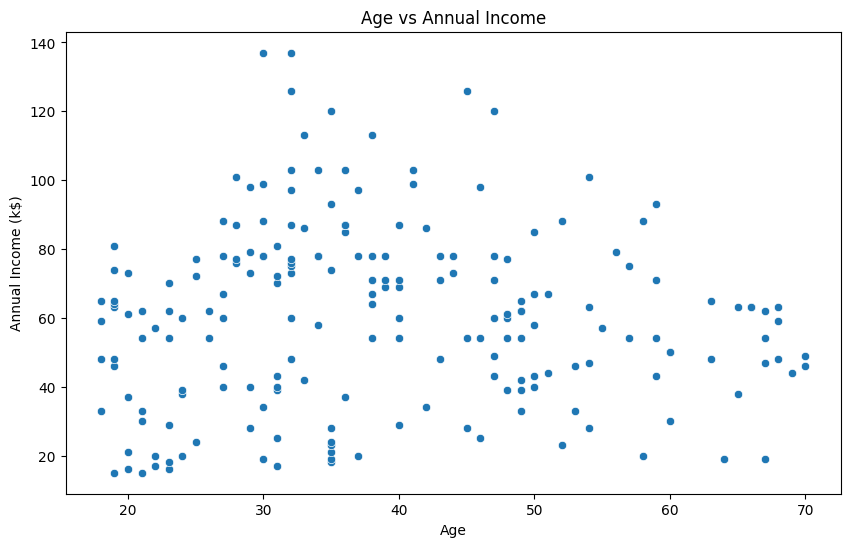

In [18]:
# EDA
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

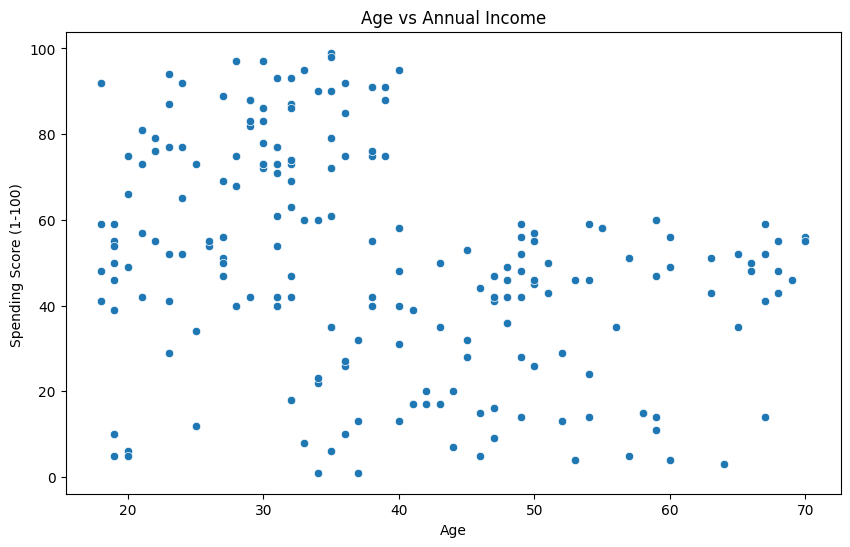

In [19]:
# EDA
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100) ')
plt.show()

In [20]:
def skewness(sk):
    if sk>0:
        return "Right skewness"
    elif sk<0:
        return "Left Skewness"
    else:
        return "Normal"
print("Skewness of Age:",skewness(df['Age'].skew()))
print("Skewness of annual income:",skewness(df['Annual Income (k$)'].skew()))
print("Skewness of SPending Score:",skewness(df['Spending Score (1-100)'].skew()))


Skewness of Age: Right skewness
Skewness of annual income: Right skewness
Skewness of SPending Score: Left Skewness


In [24]:
from sklearn.preprocessing import StandardScaler

numeric_df = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

df_scaled = pd.DataFrame(scaled_data, columns=numeric_df.columns)
df_scaled.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [26]:
# train kmeans clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)
df["Cluster"] = kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,2


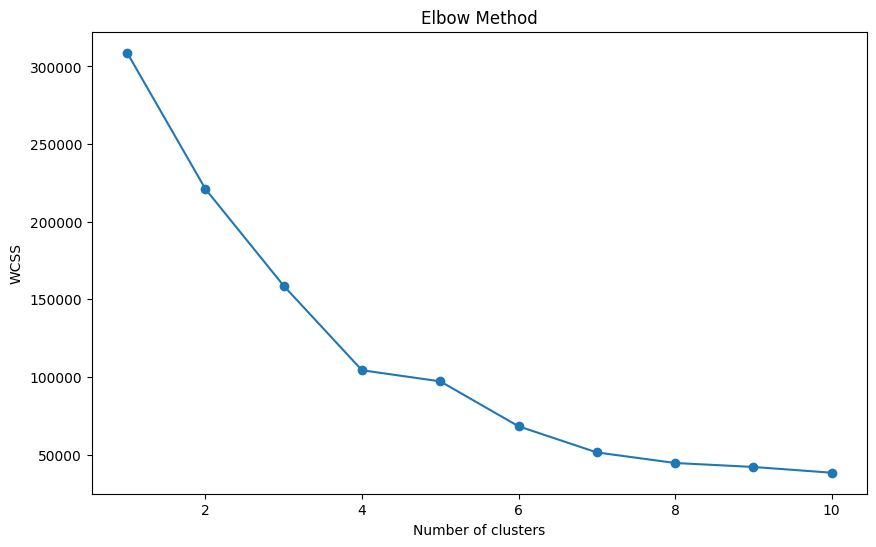

In [27]:
# check with ELBOW method to find the optimal number of clusters

from sklearn.cluster import KMeans
df_numeric = df.select_dtypes(include=['int64', 'float64'])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

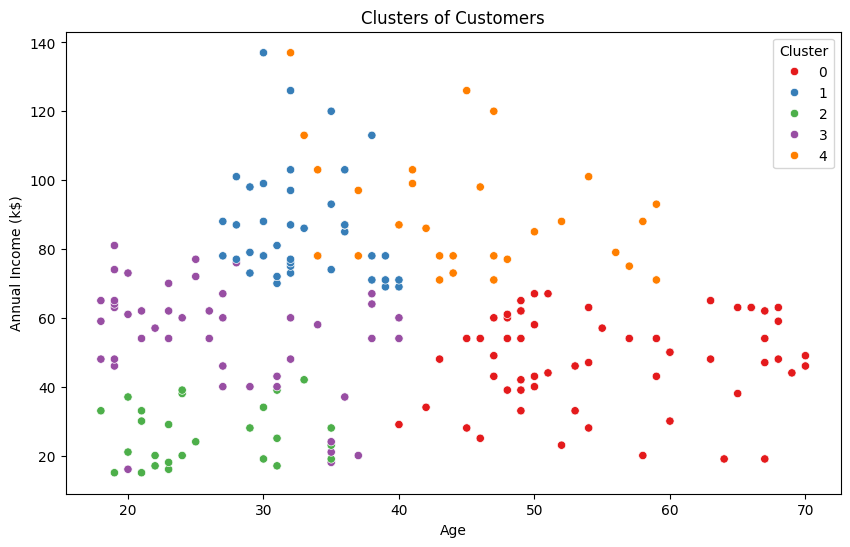

In [28]:
# display clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

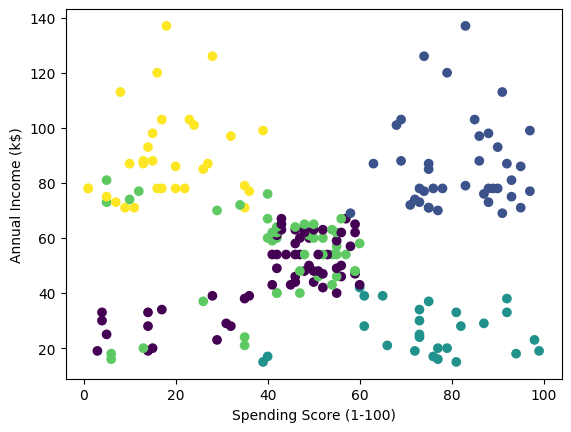

In [29]:
# display clusters
plt.scatter(df["Spending Score (1-100)"],
df["Annual Income (k$)"],
c = df["Cluster"]
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [30]:
df.to_csv("clustering_mall_customers.csv",index=False)

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = clusters

X = df_scaled.drop('Cluster', axis=1)
y = df_scaled['Cluster']


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 1.0
